## Business Problem

Diminos promises pizza delivery within **31 minutes**.
If delivery exceeds this time, the order is free for the customer.

Diminos evaluates store performance using the following metric:
- **95th Percentile of Delivery Time < 31 minutes**

Kanav wants to analyze his store's delivery performance to:
- Understand current performance
- Check compliance with Diminos' SLA
- Identify risks and improvement areas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv(r"C:\Users\lakshmilokeswari\Downloads\diminos_data.csv")

In [3]:
df.head()


,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


### Dataset Description

- Each row represents a single pizza order
- Delivery time is measured in **minutes**
- Objective is to analyze delivery time distribution


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
df.describe()


,order_id
count,1.500000e+04
mean,1.530610e+06
std,4.330271e+03
min,1.523111e+06
25%,1.526861e+06
50%,1.530610e+06
75%,1.534360e+06
max,1.538110e+06


In [6]:
df.isnull().sum()


order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

 **No missing values detected**

 
 **Delivery time values are numeric and valid**


In [8]:
df.columns = df.columns.str.strip()
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [10]:
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])


In [11]:
df["delivery_time"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds() / 60


In [12]:
df.head()


,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984


In [13]:
df["delivery_time"].describe()


count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time, dtype: float64

In [16]:
df = df[df["delivery_time"] <= 120]

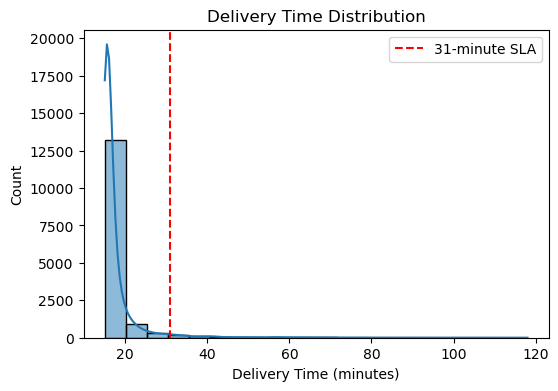

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["delivery_time"], bins=20, kde=True)
plt.axvline(31, color="red", linestyle="--", label="31-minute SLA")
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Count")
plt.legend()
plt.show()

**Since delivery time was not explicitly provided in the dataset,
it was derived using the difference between order delivery and order placement timestamps.
This feature engineering step enables SLA and percentile-based performance evaluation.**


In [18]:
p95 = np.percentile(df["delivery_time"], 95)
p95


np.float64(26.247372241666667)

In [19]:
if p95 < 31:
    print("✅ Store meets Diminos SLA")
else:
    print("❌ Store does NOT meet Diminos SLA")


✅ Store meets Diminos SLA


- Most deliveries are clustered below 31 minutes
- A long tail exists, indicating delayed orders


### SLA Check

- **95th Percentile Delivery Time:** {p95:.2f} minutes
- **SLA Requirement:** < 31 minutes


In [21]:
late_orders = df[df["delivery_time"] > 31]
late_percentage = (len(late_orders) / len(df)) * 100

late_percentage


3.2683678253298507

**Although the majority of orders are delivered on time**


**a small percentage of delayed orders significantly impacts the 95th percentile.**


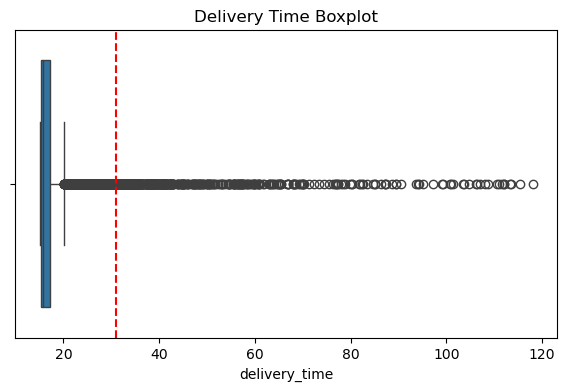

In [23]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["delivery_time"])
plt.axvline(31, color="red", linestyle="--")
plt.title("Delivery Time Boxplot")
plt.show()


- Presence of extreme outliers
- These outliers heavily influence percentile-based metrics


In [25]:
df.sort_values("delivery_time", ascending=False).head(10)


,order_id,order_placed_at,order_delivered_at,delivery_time
850,1523961,2023-03-02 11:59:23,2023-03-02 13:57:24.585448,118.026424
7962,1531073,2023-03-15 06:25:18,2023-03-15 08:20:38.566415,115.342774
3356,1526467,2023-03-06 23:35:57,2023-03-07 01:29:32.115694,113.585262
565,1523676,2023-03-02 00:36:51,2023-03-02 02:30:07.988260,113.283138
8172,1531283,2023-03-15 15:39:12,2023-03-15 17:31:19.312392,112.121873
11682,1534793,2023-03-22 02:09:45,2023-03-22 04:01:50.339259,112.088988
2274,1525385,2023-03-05 01:13:39,2023-03-05 03:05:09.874916,111.514582
1704,1524815,2023-03-04 01:14:20,2023-03-04 03:05:22.224020,111.037067
13805,1536916,2023-03-25 19:02:45,2023-03-25 20:53:15.176758,110.502946
4556,1527667,2023-03-09 01:47:50,2023-03-09 03:36:27.928836,108.632147


A small number of extreme delays are pushing the 95th percentile above SLA.
Targeting these cases can significantly improve performance.


## Recommendations to Kanav

1. Identify peak-hour delays and add delivery staff
2. Set internal SLA at 28 minutes (buffer strategy)
3. Monitor real-time alerts for orders crossing 25 minutes
4. Optimize kitchen preparation workflow
5. Analyze location-wise or time-slot-wise delays (future analysis)


## Conclusion

The analysis shows that while most orders are delivered within the promised time,
a small number of delayed orders significantly impact the 95th percentile metric.

By reducing extreme delivery delays, Kanav can:
- Meet Diminos SLA requirements
- Avoid revenue loss due to free orders
- Retain franchise ownership
